## プロファイルからの力学的特性抽出

In [1]:
from calc_texture import calc_texture, combine_csv

# プロファイルから力学的特性を算出
for condition in ['FirstStorage','SecondStorage']:
    for storage_period in ['00','01','02','03','04']:
        
        DIRECT = f'./../data/data_{condition}/data_texture/Profile{storage_period}.csv'

        df = calc_texture(DIRECT)
        df.to_csv(f'./../data/data_{condition}/data_texture/TextureFeature/Feature_{storage_period}.csv')

    # 特徴量をまとめる
    DIRECT = f'./../data/data_{condition}/data_texture/TextureFeature'
    feature_all = combine_csv(DIRECT)
    feature_all.to_csv(f'{DIRECT}/Feature_all.csv')


## 経時変化

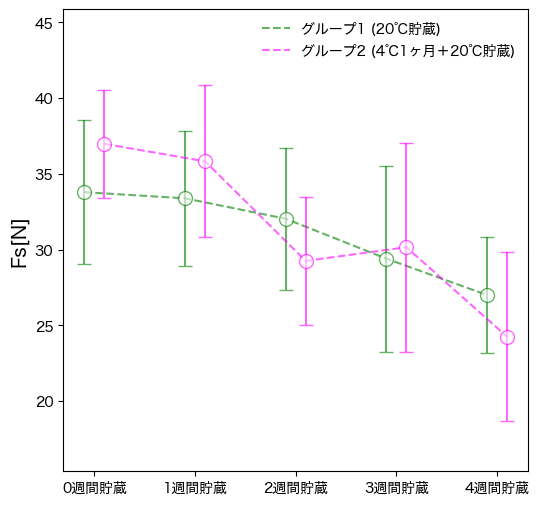

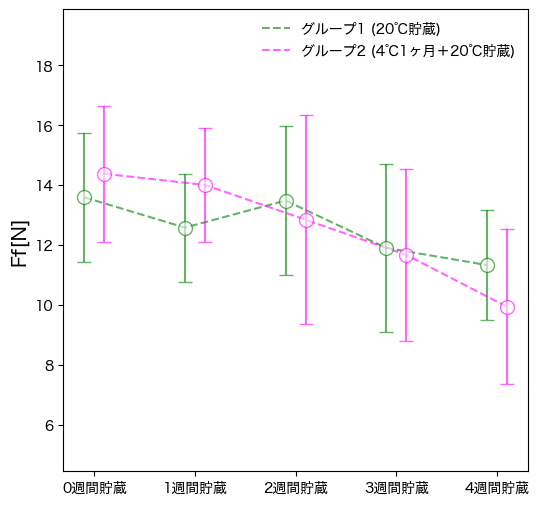

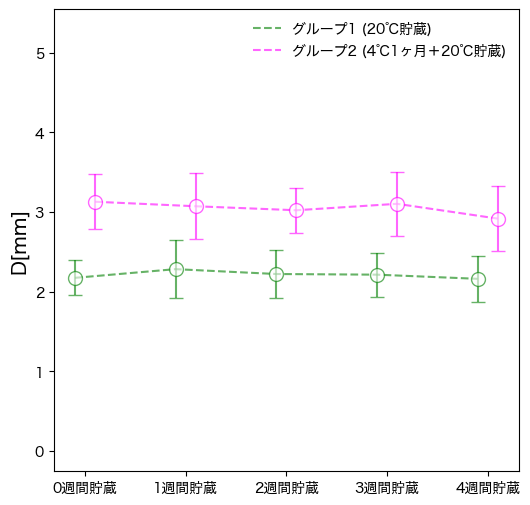

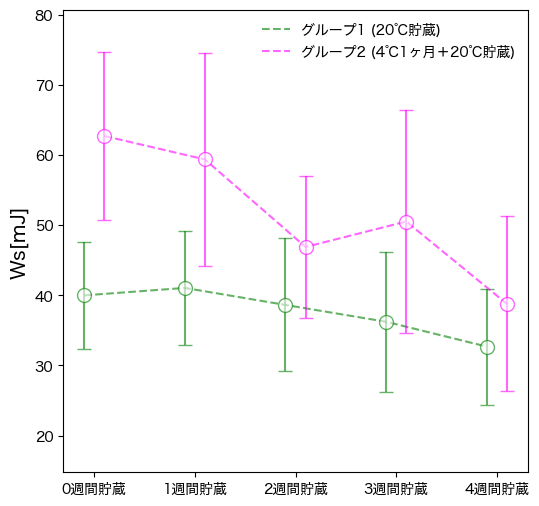

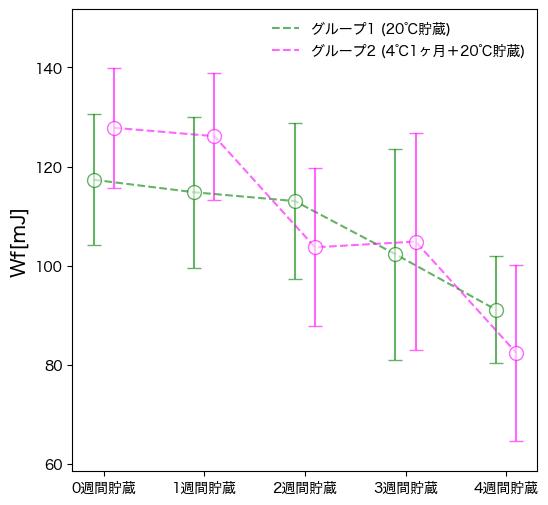

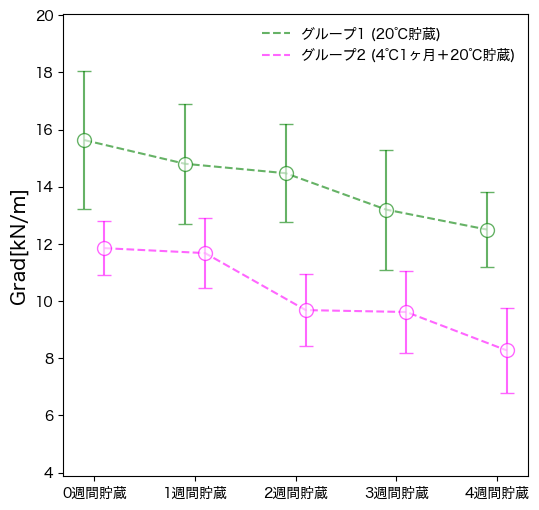

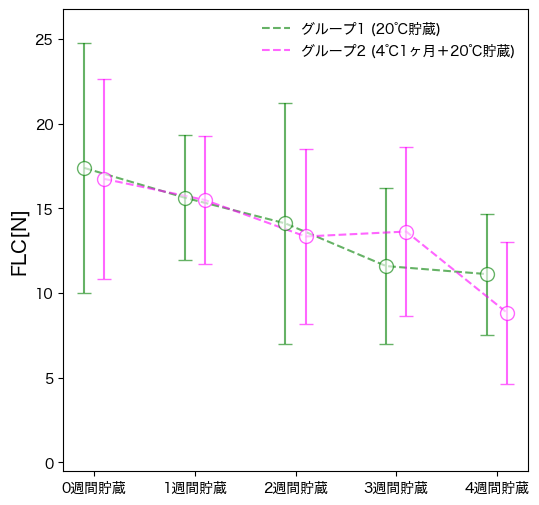

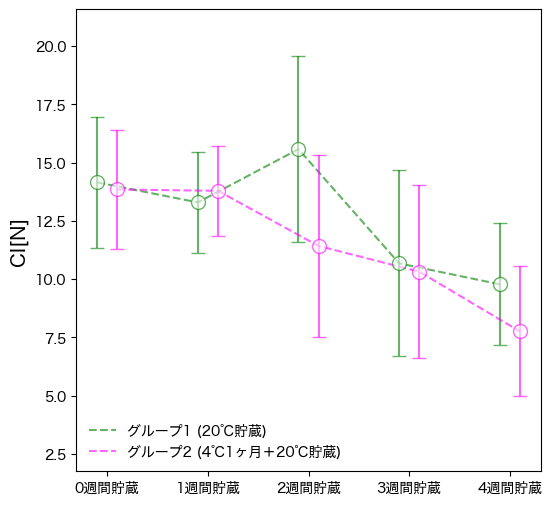

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# 各貯蔵期間ごとの推移

    
feature_First = pd.read_csv(f'./../data/data_FirstStorage/data_texture/TextureFeature/Feature_all.csv',index_col=0)
feature_Second = pd.read_csv(f'./../data/data_SecondStorage/data_texture/TextureFeature/Feature_all.csv',index_col=0)
    
for param in range(feature_First.shape[1]):

    # 各指標ごとのプロット
    data_mean_1 = []
    data_mean_2 = []
    data_std_1 = []
    data_std_2 = []
    
    for i in range(feature_all.shape[0]//20):

        # 各貯蔵期間ごとの指標の平均値と標準偏差を算出
        feature_1 = feature_First.iloc[i*20:(i+1)*20,param]
        feature_2 = feature_Second.iloc[i*20:(i+1)*20,param]
        

        mean_1 = feature_1.mean()
        mean_2= feature_2.mean()
        std_1 = feature_1.std()
        std_2 = feature_2.std()

        data_mean_1.append(mean_1)
        data_mean_2.append(mean_2)
        data_std_1.append(std_1)
        data_std_2.append(std_2)

    
    fig = plt.figure(figsize=(6,6))
    
    storage = [0,1,2,3,4]
    first_c = 'g'
    second_c = 'magenta'
    alphaa = 0.6
    
    plt.plot(storage,data_mean_1,c=first_c,label='グループ1 (20℃貯蔵)',alpha=alphaa,linestyle='dashed')
    plt.errorbar(storage, data_mean_1, yerr = data_std_1, capsize=5, fmt='o', markersize=10, 
                 ecolor=first_c, markeredgecolor = first_c, color='w',alpha=alphaa
                 )
    
    plt.errorbar(np.array(storage)+0.2, data_mean_2, yerr = data_std_2, capsize=5, fmt='o', markersize=10,
                 ecolor=second_c, markeredgecolor = second_c, color='w',alpha=alphaa
                 )
    plt.plot(np.array(storage)+0.2,data_mean_2,c=second_c,label='グループ2 (4℃1ヶ月＋20℃貯蔵)',alpha=alphaa,linestyle='dashed')
    
    # plt.ylim(-5,30)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylabel(f'{feature_First.columns[param]}',fontsize=14)
    plt.xticks([0.1,1.1,2.1,3.1,4.1],['0週間貯蔵','1週間貯蔵','2週間貯蔵','3週間貯蔵','4週間貯蔵'])
    plt.legend(frameon=False)
    plt.ylim(np.min([data_mean_1,data_mean_2])-np.max([data_std_1,data_std_2])-2,
             np.max([data_mean_1,data_mean_2])+np.max([data_std_1,data_std_2])+2)

    fig.savefig(f'./../output/図_Jona_{feature_First.columns[param][:7]}.png',dpi=400)

## 粉質化との相関

In [6]:
feature_First = pd.read_csv(f'./../data/data_FirstStorage/data_texture/TextureFeature/Feature_all.csv',index_col=0)
feature_Second = pd.read_csv(f'./../data/data_SecondStorage/data_texture/TextureFeature/Feature_all.csv',index_col=0)
    
tex = pd.DataFrame()
for param in range(feature_First.shape[1]):

    # 各指標ごとのプロット
    data_mean_1 = []
    data_mean_2 = []
    data_std_1 = []
    data_std_2 = []
    temp = pd.DataFrame()
    for i in range(feature_all.shape[0]//20):

        # 各貯蔵期間ごとの指標の平均値と標準偏差を算出
        feature_1 = feature_First.iloc[i*20:(i+1)*20,param]
        feature_2 = feature_Second.iloc[i*20:(i+1)*20,param]
        

        mean_1 = feature_1.mean()
        mean_2= feature_2.mean()
        std_1 = feature_1.std()
        std_2 = feature_2.std()

        data_mean_1.append(mean_1)
        data_mean_2.append(mean_2)
        data_std_1.append(std_1)
        data_std_2.append(std_2)
    
    temp =  pd.concat([pd.DataFrame(data_mean_1),pd.DataFrame(data_mean_2)],axis=0)
    temp.index = [i for i in range(10)]
    temp.columns = [feature_First.columns[param]]
    tex = pd.concat([tex,temp],axis=1)
    
# 粉質化の追加
mealiness = [-0.51505214,  2.92039348,  2.61428062, 12.14321494, 17.67755921,
             3.37701933,  7.95686189,  8.70464898, 10.5936563 , 15.39777507]
mealiness = pd.DataFrame(mealiness,columns=['Mealiness'])

temp = pd.concat([tex,mealiness],axis=1)

In [8]:
# 粉質化との相関
temp.corr()['Mealiness']

Fs[N]        -0.789795
Ff[N]        -0.791159
D[mm]         0.120434
Ws[mJ]       -0.317702
Wf[mJ]       -0.799558
Grad[kN/m]   -0.635937
FLC[N]       -0.885544
CI[N]        -0.884129
Mealiness     1.000000
Name: Mealiness, dtype: float64

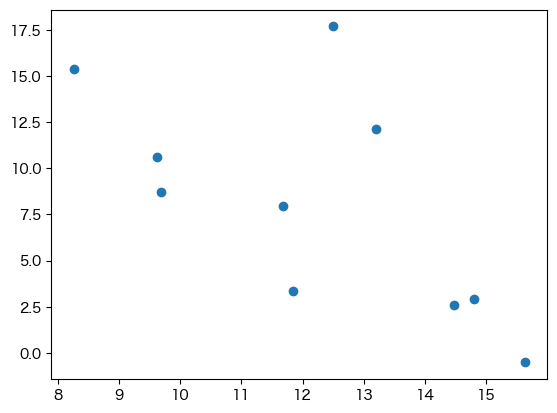

In [9]:
plt.scatter(temp['Grad[kN/m]'],temp['Mealiness'])

In [10]:
feature_First.columns[param]

'CI[N]'

In [11]:
data_mean_2

[13.846701249999999,
 13.790027600000002,
 11.421949449999994,
 10.318346799999995,
 7.754594499999998]